<a href="https://colab.research.google.com/github/vishwanathbeena/appliedai_practice/blob/main/8D_LR_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task-D: Collinear features and their effect on linear models

In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/task_d.csv')

In [ ]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [ ]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

In [ ]:
features = data.drop(['target'], axis=1).columns.values

### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

#Task 1:

In [ ]:
cor_mat = data.corr()
print(cor_mat)

                  x         y         z  ...  2*z+3*x*x         w    target
x          1.000000 -0.205926  0.812458  ...   0.996252  0.583277  0.728290
y         -0.205926  1.000000 -0.602663  ...  -0.261123 -0.401790 -0.690684
z          0.812458 -0.602663  1.000000  ...   0.847163  0.674486  0.969990
x*x        0.997947 -0.209289  0.807137  ...   0.997457  0.583803  0.719570
2*y       -0.205926  1.000000 -0.602663  ...  -0.261123 -0.401790 -0.690684
2*z+3*x*x  0.996252 -0.261123  0.847163  ...   1.000000  0.606860  0.764729
w          0.583277 -0.401790  0.674486  ...   0.606860  1.000000  0.641750
target     0.728290 -0.690684  0.969990  ...   0.764729  0.641750  1.000000

[8 rows x 8 columns]


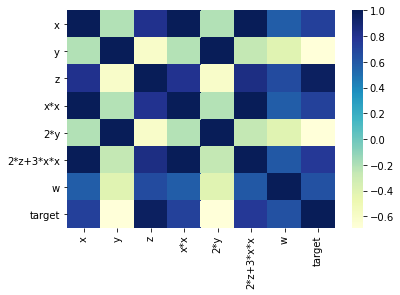

In [ ]:
sns.heatmap(cor_mat,cmap="YlGnBu")


best model weights are [[ 0.50413694 -0.6141252   0.86031522  0.48723515 -0.6141252   0.54238387
   0.44482684]]
best model edited weights are [[ 0.50422001 -0.61404155  0.86034632  0.48732656 -0.61404155  0.54246886
   0.44486885]]
Accuracy difference is 0.0
Weights differnece is [[8.30683048e-05 8.36590216e-05 3.11049220e-05 9.14082567e-05
  8.36590216e-05 8.49952254e-05 4.20165207e-05]]
Top 4 features with difference in weights are ['x*x', '2*z+3*x*x', 'y', '2*y']


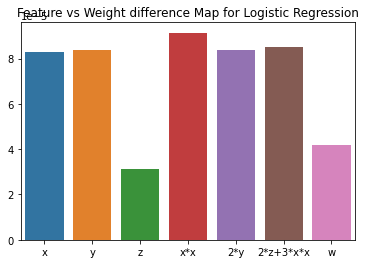

In [ ]:

from sklearn.metrics import accuracy_score
hyper_param_dict = {}
hyper_param_dict['alpha'] = [0.00001,0.0001,0.001,0.01,0.1,1]
# hyper_param_dict['loss'] = ['log']
# hyper_param_dict['eta0'] = [0.001]
# hyper_param_dict['learning_rate'] = ['constant']
# hyper_param_dict['random_state'] = [0]

clf = SGDClassifier(eta0=0.001,learning_rate='constant',random_state=0,loss='log')
search = GridSearchCV(clf,hyper_param_dict,scoring='accuracy',cv=5,return_train_score=True)
results = search.fit(X,Y)
best_estimator = results.best_estimator_
best_estimator.fit(X,Y)
trainY = best_estimator.predict(X)
best_model_accuracy = accuracy_score(Y,trainY)
best_model_coef = best_estimator.coef_
print('best model weights are {}'.format(best_model_coef))
X_dash = X + 0.001
best_estimator.fit(X_dash,Y)
testY = best_estimator.predict(X_dash)
best_model_edited_accuracy = accuracy_score(Y,testY)
best_model_edited_coef = best_estimator.coef_
print('best model edited weights are {}'.format(best_model_edited_coef))
accuracy_diff = np.abs(best_model_accuracy - best_model_edited_accuracy)
print('Accuracy difference is {}'.format(accuracy_diff))
weights_diff = np.abs(best_model_coef - best_model_edited_coef )
print('Weights differnece is {}'.format(weights_diff))
weight_diff_map = zip(features,weights_diff[0])
sorted_weight_diff = sorted(weight_diff_map,key = lambda x:x[1],reverse=True)
top_4_features = []
for i in sorted_weight_diff[:4]:
  top_4_features.append(i[0])
print('Top 4 features with difference in weights are {}'.format(top_4_features))

sns.barplot(x=features,y=weights_diff[0])
plt.title('Feature vs Weight difference Map for Logistic Regression')
plt.show()


#Observaton:
As expected, major features with difference weights are the features which are colinear. such as x*x,2*Y,2*z+3*x*x.

Since we added a small weight the values, Now, the colinieality could not be maintained and It gave difference in weights of colinear features.

So, We cannot use weights as feature importance values.

#Task 2

best model weights are [[ 0.24408406 -0.336364    0.51174047  0.23212532 -0.336364    0.27069847
   0.21058128]]
best model edited  weights are [[ 0.24415806 -0.33629     0.51181447  0.23219932 -0.33629     0.27077247
   0.21065528]]
Accuracy difference is 0.0
Weights differnece is [[7.39992286e-05 7.39992286e-05 7.39992286e-05 7.39992286e-05
  7.39992286e-05 7.39992286e-05 7.39992286e-05]]
Top 4 features with difference in weights are ['2*z+3*x*x', 'z', 'y', '2*y']


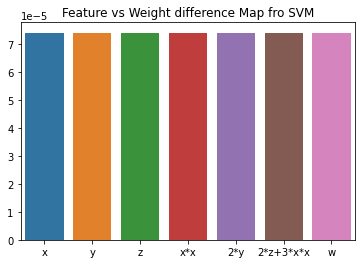

In [ ]:
from sklearn.metrics import accuracy_score
hyper_param_dict = {}
hyper_param_dict['alpha'] = [0.00001,0.0001,0.001,0.01,0.1,1]

clf = SGDClassifier(eta0=0.001,learning_rate='constant',random_state=0,loss='hinge')
search = GridSearchCV(clf,hyper_param_dict,scoring='accuracy',cv=5,return_train_score=True)
results = search.fit(X,Y)
best_estimator = results.best_estimator_
best_estimator.fit(X,Y)
trainY = best_estimator.predict(X)
best_model_accuracy = accuracy_score(Y,trainY)
best_model_coef = best_estimator.coef_
print('best model weights are {}'.format(best_model_coef))
X_dash = X + 0.001
best_estimator.fit(X_dash,Y)
testY = best_estimator.predict(X_dash)
best_model_edited_accuracy = accuracy_score(Y,testY)
best_model_edited_coef = best_estimator.coef_
print('best model edited  weights are {}'.format(best_model_edited_coef))
accuracy_diff = np.abs(best_model_accuracy - best_model_edited_accuracy)
print('Accuracy difference is {}'.format(accuracy_diff))
weights_diff = np.abs(best_model_coef - best_model_edited_coef )
print('Weights differnece is {}'.format(weights_diff))
weight_diff_map = zip(features,weights_diff[0])
sorted_weight_diff = sorted(weight_diff_map,key = lambda x:x[1],reverse=True)
top_4_features = []
for i in sorted_weight_diff[:4]:
  top_4_features.append(i[0])
print('Top 4 features with difference in weights are {}'.format(top_4_features))

sns.barplot(x=features,y=weights_diff[0])
plt.title('Feature vs Weight difference Map fro SVM')
plt.show()

#Observation:

The difference is same in all the features.

It could be because of using SVM, because SVM tries to select a plane with maximum margin.

We have added some value to each featue, means we have pushed each value by same quantity in that dimension.

So, the new plane which differentiates new edited points also has been pushed by certain fixed quantity.

By changing the value added to 0.005, I could see the values have changed like this here also, major difference ie for Non colinear features Z,W,X and only 2*z+3*x*x is the colinear feature. 


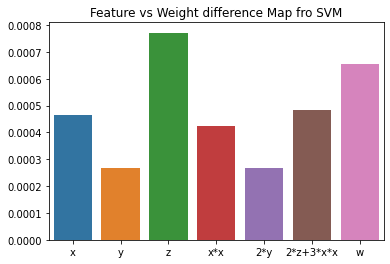
